### Plan du Projet DATA :

_____________________________________________________________

1. Traitement de données : compréhension des données, analyse de la 
complétude et de la conformité des données, contrôles de cohérence
(univarié/multivarié), gestion des anomalies : mise en place de correctif, 
exclusions, etc.
2. Jointures éventuelles de bases et contrôles 
3. Analyses descriptives des données : univariée, multivariée, ASD
4. Analyse graphique (data visualisation) + Interfaçage via Shiny for Python 
5. Modélisation : supervisée (régression, classification) vs non supervisée ; 
paramétrique (économétriques) vs non paramétriques (machine learning)
6. Analyse des résultats : interprétation, explications 
7. Application : prévision, tarification, etc.



- Understanding the Problem Statement
- 2. Import Data and Required Packages
    2.1 Import Packages
    2.2 Import Data
    2.3 Show top 5
- 3. Data Preprocessing 
    - 3.1 DB_SIN
        * 3.1.a Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values, Anomalies fix)
        * 3.1.b Preprocessing and Exploratory Analysis
        * 3.1.c Visualization
    - 3.2 DB_CNT
        * 3.2.a Data Check and cleaning (Missing Values, Duplicates, Data Types, Unique values)
        * 3.2.b Preprocessing and Exploratory Analysis
        * 3.2.c Visualization
    - 3.3 DB_TELEMATICS
        * 3.3.a Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values)
        * 3.3.b Preprocessing and Exploratory Analysis
        * 3.3.c Visualization
- 4. DataBase Merges : 
    * 4.1. Descriptive Data Analysis : Univaried/Multivaried
    * 4.2. Analyse graphique (data visualisation) + Interfaçage via Shiny for Python 
- 5. Modélisation
    * 5.1 supervisée (régression, classification) vs non supervisée ; 
    * 5.2 paramétrique (économétriques) vs non paramétriques (machine learning)
- 7. Analyse des résultats : interprétation, explications 
- 8. Application : prévision, tarification, etc.

## 1) Statement
##### 1.1 Problem statement
- Our project revolves around harnessing the potential of recently acquired insurance databases. The objective is to extract meaningful insights and actionable information to enhance our understanding of the insurance landscape.
- Given the constraints and in line with industry standards, we have chosen Python as our primary tool for data analysis. Python's versatility and extensive libraries, such as Pandas, NumPy, and Scikit-learn, will be crucial in efficiently handling, processing, and analyzing the vast amounts of insurance data at our disposal.


##### 1.2 Import Data and Required Packages
- Dataset Source :
    * DB_SIN.txt
    * DB_CNT.xlsx
    * DB_TELEMATICS.csv
    

## 2. Import Packages
  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2.2 Import Data

In [5]:
# Read DB_SIN.txt
sin_df = pd.read_csv('Data/DB_SIN.txt', delimiter='\t')  # Assuming it's a tab-separated file

# Read DB_CNT.xlsx from the sheet named 'DB_CNT'
cnt_df = pd.read_excel('Data/DB_CNT.xlsx', sheet_name='DB_CNT')

# Read DB_Telematics.csv
telematics_df = pd.read_csv('Data/DB_Telematics.csv', delimiter=';')


#### 2.3 Show top 5

In [6]:
sin_df.head()

,Id_pol,NB_Claim,AMT_Claim
0,212433,1,"1137,079102"
1,124370,1,"3170,102051"
2,208357,1,"3753,909668"
3,141403,1,"16,03637695"
4,173366,1,"41774,71289"


We immediately see the disparity on the comma placement in AMT_Claim.

In [7]:
cnt_df.head()

,Id_pol,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,Territory
0,121744,365,59,Female,5,Single,Private,491.0,Urban,12427.42,40,77
1,123584,182,32,F,10,Married,Private,730.0,Rural,6213.71,4,89
2,133223,365,59,F,9,Single,Commute,689.0,Rural,12427.42,41,85
3,124356,237,54,Male,8,Married,Commute,794.0,Urban,6213.71,37,70
4,192713,365,40,Female,0,Married,Commute,880.0,Urban,12427.42,8,76


We notice some matter in Insured.sex inputs, we will investigate it further.

In [8]:
telematics_df.head()

,Id_pol,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,Pct.drive.tue,Pct.drive.wed,Pct.drive.thr,Pct.drive.fri,Pct.drive.sat,Pct.drive.sun,...,Left.turn.intensity08,Left.turn.intensity09,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12
0,cnt_122389,"0,997260274","5372,837273","0,192885196","0,169068979","0,197889028","0,184917416","0,16189224","0,056223054","0,037124086",...,2366.0,1609.0,751.0,339.0,107.0,766.0,366.0,91.0,35.0,8.0
1,cnt_125019,"0,912328767","5780,818246","0,103235423","0,11866897","0,107923307","0,137310889","0,174103462","0,203041338","0,155716612",...,4.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,cnt_181154,"0,526027397","9149,738331","0,116469365","0,145887688","0,13527532","0,173257616","0,160496263","0,084183125","0,184430624",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,cnt_140021,1,"10582,26663","0,144175656","0,151476187","0,168558752","0,171549272","0,177907998","0,114748693","0,071583442",...,736.0,295.0,58.0,16.0,6.0,656.0,294.0,65.0,18.0,4.0
4,cnt_170356,"0,75890411","9412,021708","0,109676276","0,152352793","0,151707136","0,160847296","0,140824794","0,151463464","0,133128241",...,33.0,12.0,2.0,1.0,0.0,39.0,14.0,2.0,0.0,0.0


## 3. Data Preprocessing 

### 3.1 : DB_Sin

- 3.1.a : Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values, Anomalies fix)

In [9]:
sin_df.shape

(4337, 3)

In [10]:
sin_df.isna().sum()

Id_pol       0
NB_Claim     0
AMT_Claim    0
dtype: int64

In [11]:
print("DB_SIN.txt DataFrame:")
print(sin_df.info())

DB_SIN.txt DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id_pol     4337 non-null   int64 
 1   NB_Claim   4337 non-null   object
 2   AMT_Claim  4337 non-null   object
dtypes: int64(1), object(2)
memory usage: 101.8+ KB
None


In [12]:
# Check for duplicates in 'Id_pol' and print information for sin_df
duplicates_info_sin = sin_df['Id_pol'].value_counts()
duplicates_info_sin = duplicates_info_sin[duplicates_info_sin > 1]  # Filter only values with more than one occurrence

total_duplicates_sin = duplicates_info_sin.sum()

In [13]:
print("\nDuplicated 'Id_pol' values and their counts in sin_df DataFrame:")
print(duplicates_info_sin)
print(f"\nTotal count of duplicates in sin_df: {total_duplicates_sin}")


Duplicated 'Id_pol' values and their counts in sin_df DataFrame:
Id_pol
154194    2
136535    2
121690    2
126631    2
156905    2
135745    2
191525    2
166439    2
147829    2
123427    2
216663    2
130278    2
121827    2
147493    2
131216    2
141188    2
166742    2
151693    2
186391    2
195504    2
132486    2
193970    2
149978    2
198149    2
154427    2
155622    2
161618    2
149999    2
Name: count, dtype: int64

Total count of duplicates in sin_df: 56


In [14]:
# Check for duplicates in 'Id_pol' in sin_df
duplicates_info_sin = sin_df[sin_df.duplicated(subset=['Id_pol'], keep=False)]

# Filter duplicates where 'AMT_Claim' is equal to 0 and drop those rows
sin_df = sin_df.drop(sin_df[(sin_df['Id_pol'].isin(duplicates_info_sin['Id_pol'])) & (sin_df['AMT_Claim'] == 0)].index)

# Confirm the changes
print("sin_df after removing duplicates with 'AMT_Claim' == 0:")
print(sin_df)
numeric_summary = sin_df['NB_Claim'].describe()
numeric_summary
unique_values = sin_df['NB_Claim'].unique()

sin_df after removing duplicates with 'AMT_Claim' == 0:
      Id_pol NB_Claim    AMT_Claim
0     212433        1  1137,079102
1     124370        1  3170,102051
2     208357        1  3753,909668
3     141403        1  16,03637695
4     173366        1  41774,71289
...      ...      ...          ...
4332  181390        1  3507,032593
4333  125458        1            0
4334  185300        1  484,9214172
4335  175683        1            0
4336  215717        1   6034,40625

[4337 rows x 3 columns]


In [15]:
# Display the unique values
print("Unique values in 'NB_Claim':")
print(unique_values)

Unique values in 'NB_Claim':
['1' '2' 'NB_CLAIM:1' 'NB_CLAIM:2' '3']


In [16]:
# Replace specific values in 'NB_Claim'
sin_df['NB_Claim'] = sin_df['NB_Claim'].replace({'NB_CLAIM:1': '1', 'NB_CLAIM:2': '2'})

unique_values = sin_df['NB_Claim'].unique()
print("Unique values in 'NB_Claim':")
print(unique_values)


Unique values in 'NB_Claim':
['1' '2' '3']


In [17]:
# Display descriptive statistics for numeric columns
numeric_summary = sin_df.describe()

# Display summary for object columns
object_summary = sin_df.describe(include='object')

In [18]:
# Display the results
print("Numeric Summary:")
print(numeric_summary)

Numeric Summary:
              Id_pol
count    4337.000000
mean   170183.869264
std     29131.411617
min    100210.000000
25%    145343.000000
50%    170597.000000
75%    195469.000000
max    221064.000000


In [19]:
print("\nObject Summary:")
print(object_summary)



Object Summary:
       NB_Claim AMT_Claim
count      4337      4337
unique        3      3851
top           1         0
freq       4154       436


We will have to turn NB_Claim and AMT_Claim to integers.

In [20]:
# Display unique values and their counts in 'AMT_Claim'
unique_values_counts = sin_df['AMT_Claim'].value_counts(dropna=False)

# Display the results
print("Unique values and their counts in 'AMT_Claim':")
print(unique_values_counts)

Unique values and their counts in 'AMT_Claim':
AMT_Claim
0              436
ANN             37
279,9525146      9
477,3110047      7
1710,054932      2
              ... 
9324,375         1
1164,303863      1
1625,644409      1
4381,549073      1
6034,40625       1
Name: count, Length: 3851, dtype: int64


Lets fix the ANN situation, we will turn ANN (NaN's) into 0. and convert them to integers since these values are "amounts".  
Secondly, we will take off the decimal part since it'll be easier for operations.  AMT_Claim is the Agregated Amount of CLAIM (probably in dollars $, € or £)

In [21]:
# Convert 'AMT_Claim' to numeric (replace 'ANN' with 0)
sin_df['AMT_Claim'] = sin_df['AMT_Claim'].replace({'ANN': '0'})

# Extract the part before the comma and convert to numeric
sin_df['AMT_Claim'] = sin_df['AMT_Claim'].astype(str).str.split(',').str[0]
sin_df['AMT_Claim'] = pd.to_numeric(sin_df['AMT_Claim'], errors='coerce')
# Display unique values and their counts in 'AMT_Claim'
unique_values_counts = sin_df['AMT_Claim'].value_counts(dropna=False)

# Display the results
print("Unique values and their counts in 'AMT_Claim':")
print(unique_values_counts)


Unique values and their counts in 'AMT_Claim':
AMT_Claim
0       474
279      12
477      10
293       6
299       5
       ... 
703       1
202       1
4163      1
2438      1
6034      1
Name: count, Length: 2887, dtype: int64


In [22]:
# Convert 'NB_Claim' to numeric (replace ',' with '.' if needed)
sin_df['NB_Claim'] = pd.to_numeric(sin_df['NB_Claim'].str.replace(',', '.'), errors='coerce')
print("DB_SIN.txt DataFrame:")
print(sin_df.info())

DB_SIN.txt DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id_pol     4337 non-null   int64
 1   NB_Claim   4337 non-null   int64
 2   AMT_Claim  4337 non-null   int64
dtypes: int64(3)
memory usage: 101.8 KB
None


#### Conclusion for Sin_DF data prepocessing : 

For the SIN_DF data we did the following things to clean up the data :
1. NB_Claim : We managed to have 3 differents inputs ('1','2','3') and put them as integers
2. AMT_Claim : we managed to put the values as integers and 
3. Turned all ANN (NaN's) to 0
4. We corrected the 'comma'/'point' situation for the numeric values

#### 3.1.b Preprocessing and Exploratory Analysis

In [23]:
sin_df.describe()

,Id_pol,NB_Claim,AMT_Claim
count,4337.000000,4337.000000,4337.000000
mean,170183.869264,1.044731,3135.737376
std,29131.411617,0.218664,5136.336391
min,100210.000000,1.000000,0.000000
25%,145343.000000,1.000000,491.000000
50%,170597.000000,1.000000,1668.000000
75%,195469.000000,1.000000,3702.000000
max,221064.000000,3.000000,104074.000000


- The mean amount of AMT_Claim is 3136.  
- The max amount is 104074.  
- Most of the people (75%) gets above 3702.  
- 474 (around 10%) did get 0.  

We can look to see which category of 'NB_Claim' get the most of money (A boxplot with outliers would give the hint).

#### 3.1.c Visualization

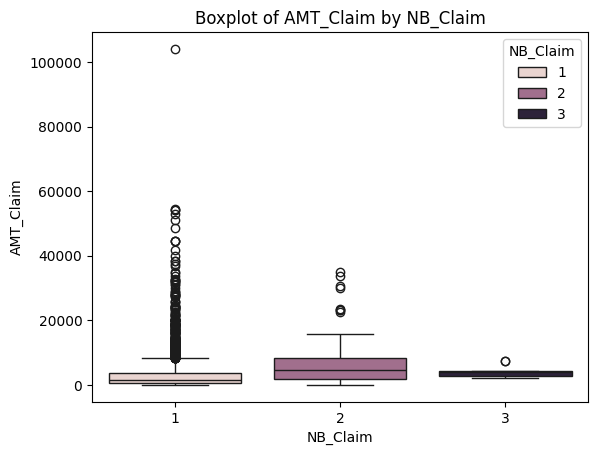

In [24]:
sns.boxplot(x='NB_Claim', y='AMT_Claim', data=sin_df, hue='NB_Claim')
plt.title('Boxplot of AMT_Claim by NB_Claim')
plt.show()
 

Visualizing the Boxplot of AMT_Claim by NB_Claim we notice the outliers on each category of NB_Claim.  
While the mean is around 3136 FOR AMT_Claim we observe values going from 10.000 to 104.000 for NB_Claim == 1. 

### 3.2 : DB_CNT
   - 3.2.a : Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values, Anomalies fix)

In [25]:
print("\nDB_CNT.xlsx DataFrame:")
print(cnt_df.info())


DB_CNT.xlsx DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100399 entries, 0 to 100398
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id_pol              100399 non-null  int64  
 1   Duration            100399 non-null  int64  
 2   Insured.age         100399 non-null  int64  
 3   Insured.sex         100399 non-null  object 
 4   Car.age             100399 non-null  int64  
 5   Marital             100307 non-null  object 
 6   Car.use             100399 non-null  object 
 7   Credit.score        100399 non-null  float64
 8   Region              100271 non-null  object 
 9   Annual.miles.drive  100399 non-null  float64
 10  Years.noclaims      100399 non-null  object 
 11  Territory           100399 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB
None


#### The DataSet is shaped as (100399, 12). 100399 rows and 12 columns.  
- Duration : Duration of the insurance coverage of a given policy, in days  
- Insured.age : Age of insured driver, in years  
- Insured.sex : Sex of insured driver (Male/Female)  
- Car.age : Age of vehicle, in years  
- Marital : Marital status (Single/Married)  
- Car.use : Use of vehicle: Private, Commute, Farmer, Commercial  
- Credit.score : Credit score of insured driver  
- Region  : Type of region where driver lives: rural, urban  
- Annual.miles.drive : Annual miles expected to be driven declared by driver  
- Years.noclaims : Number of years without any claims  
- Territory : Territorial location of vehicle  
Conditions to meet :   
• Duration is the period that policyholder is insured in days, with values in [22,366].  
• Insured.age is the age of insured driver in integral years, with values in [16,103].  
• Car.age is the age of vehicle, with values in [-2,20]. Negative values are rare but are possible as buying a newer model can be up to two years in advance.  
• Years.noclaims is the number of years without any claims, with values in [0, 79] and
always less than Insured.age.  
• Territory is the territorial location code of vehicle, which has 55 labels in {11,12,13,· · · ,91}. 

In [26]:
# Check for duplicates in 'Id_pol' and print information for cnt_df
duplicates_info_cnt = cnt_df['Id_pol'].value_counts()
duplicates_info_cnt = duplicates_info_cnt[duplicates_info_cnt > 1]  # Filter only values with more than one occurrence

total_duplicates_cnt = duplicates_info_cnt.sum()

print("Duplicated 'Id_pol' values and their counts in cnt_df DataFrame:")
print(duplicates_info_cnt)
print(f"\nTotal count of duplicates in cnt_df: {total_duplicates_cnt}")

Duplicated 'Id_pol' values and their counts in cnt_df DataFrame:
Id_pol
130737    3
191358    3
152072    3
214317    3
183276    3
         ..
148375    2
143962    2
126880    2
188064    2
161902    2
Name: count, Length: 135, dtype: int64

Total count of duplicates in cnt_df: 275


In [27]:
# Check for duplicates in 'Id_pol'
duplicates_cnt = cnt_df[cnt_df.duplicated(subset=['Id_pol'], keep=False)]

# Print information about duplicates in cnt_df
print(f"Total count of duplicates in cnt_df: {len(duplicates_cnt)}")

Total count of duplicates in cnt_df: 275


In [28]:
# Identify and print details of duplicates
duplicates_mask = cnt_df.duplicated(subset=['Id_pol'], keep=False)
duplicates_df = cnt_df[duplicates_mask]

print(f"Total count of duplicates: {len(duplicates_df)}")
print("Details of duplicates:")
print(duplicates_df)

Total count of duplicates: 275
Details of duplicates:
        Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
537     122310       366           70      Female        6  Married            
748     215699       366           41        Male        3  Married       14   
1491    125510       366           39      Female        0  Married       54   
1644    214317       366           53      Female        6   Single       21   
2699    143962       181           47      Female       -1   Single  Commute   
...        ...       ...          ...         ...      ...      ...      ...   
99368   126690         0           44      Female        3  Married  Commute   
99749   154774       221           61        Male       14  Married       62   
99851   129569       182           68        Male        5    Marié  Private   
100075  215913       184           59        Male       16      NaN  Commute   
100186  195218       366           39        Male        7    Celi

In [29]:
# Remove rows where 'Marital' is empty only for the duplicates
empty_marital_mask = duplicates_df['Marital'].isna() | (duplicates_df['Marital'] == '')
cnt_df = cnt_df[~(duplicates_mask & empty_marital_mask)]

# Check the result
print(f"Total count after removing duplicates with empty 'Marital': {len(cnt_df)}")
cnt_df.dropna(subset=['Marital'], inplace=True)
print(f"We Delete rows where 'Marital' is empty. We notice that most of them are duplicates")

print("\nDB_CNT.xlsx DataFrame:")
print(cnt_df.info())


Total count after removing duplicates with empty 'Marital': 100307
We Delete rows where 'Marital' is empty. We notice that most of them are duplicates

DB_CNT.xlsx DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 100307 entries, 0 to 100398
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id_pol              100307 non-null  int64  
 1   Duration            100307 non-null  int64  
 2   Insured.age         100307 non-null  int64  
 3   Insured.sex         100307 non-null  object 
 4   Car.age             100307 non-null  int64  
 5   Marital             100307 non-null  object 
 6   Car.use             100307 non-null  object 
 7   Credit.score        100307 non-null  float64
 8   Region              100179 non-null  object 
 9   Annual.miles.drive  100307 non-null  float64
 10  Years.noclaims      100307 non-null  object 
 11  Territory           100307 non-null  int64  
dtypes: float64(2),

In [30]:
# Filter object variables
object_columns = cnt_df.select_dtypes(include='object').columns

# Display unique values for each object variable
for column in object_columns:
    unique_values = cnt_df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Insured.sex':
['Female' 'F' 'Male' 'H' 'Unknown']

Unique values in 'Marital':
['Single' 'Married' 'Celib' 'Marié']

Unique values in 'Car.use':
['Private' 'Commute' 25 'Commercial' 'Farmer' ' ' 14 47 100 54 21 80 95 8
 10 74 94 26 17 34 29 96 78 11 1 6 19 69 85 52 42 88 72 99 24 84 15 71 53
 40 64 9 59 55 46 82 66 0 32 39 36 23 51 '  ' '??' 92 57 22 65 87 63 35 16
 62 50 90 70 3 12 5 68 75 4 18 76 2 89 83 7 73 77 27 91 61 20 '???' 33 93
 13 38 45 81 '?' 86 48 49 60 97 58 43 67 '     ' 44 37 '????' 41 28 'Inc'
 30 'Ukwn' 31]

Unique values in 'Region':
['Urban' 'Rural' nan]

Unique values in 'Years.noclaims':
[40 4 41 37 8 6 57 23 28 54 3 10 21 30 66 43 13 31 17 32 26 34 25 27 45 33
 24 11 51 39 22 15 46 19 20 5 44 42 36 29 59 62 55 58 12 1 9 50 47 2 48
 'EAJ' 35 18 49 7 56 14 38 52 63 67 16 53 65 0 61 64 60 68 69 72 70 74 73
 76 75 71 77 78 79 85 82 80]



##### Imputation of missing Values, and Miss-written Inputs.
We will proceed as following :

- Insured.Sex : We will match inputs as Male, Female  
- Marital : Single, Married  
- Car use : Private, Commute, Farmer, Commercial. We will use Territory values to commute to the right car use value.  
- Region : Urban, Rural. With help of terrority we will find the right Region for missing values.  
- Year.noclaims : EAJ > 0, Then we will turn the column to integer. 

In [31]:
# Count occurrences of unique values in 'Insured.sex'
sex_counts = cnt_df['Insured.sex'].value_counts()

# Display the result
print("Count of unique values in 'Insured.sex':")
print(sex_counts)
print()


Count of unique values in 'Insured.sex':
Insured.sex
Male       45885
Female     39020
H           8165
F           7124
Unknown      113
Name: count, dtype: int64



In [32]:
# Count occurrences of unique values in 'Region'
Region_counts = cnt_df['Region'].value_counts()

# Display the result
print("Count of unique values in 'Region':")
print(Region_counts)
print()


Count of unique values in 'Region':
Region
Urban    78288
Rural    21891
Name: count, dtype: int64



In [33]:
# Count occurrences of unique values in 'Marital'
marital_counts = cnt_df['Marital'].value_counts()

# Display the result
print("Count of unique values in 'Marital':")
print(marital_counts)

Count of unique values in 'Marital':
Marital
Married    65666
Single     28214
Marié       4467
Celib       1960
Name: count, dtype: int64


In [34]:
# Map values in 'Insured.sex'
sex_mapping = {'Male': ['Male', 'H', 'Unknown'], 'Female': ['Female', 'F']}

# Replace values in 'Insured.sex'
for category, values in sex_mapping.items():
    cnt_df['Insured.sex'] = cnt_df['Insured.sex'].replace(values, category)

# Verify the result
sex_counts_after_mapping = cnt_df['Insured.sex'].value_counts()
print("Count of unique values in 'Insured.sex' after mapping:")
print(sex_counts_after_mapping)
# Map values in 'Marital'
marital_mapping = {'Single': ['Single', 'Celib'], 'Married': ['Married', 'Marié']}

# Replace values in 'Marital'
for category, values in marital_mapping.items():
    cnt_df['Marital'] = cnt_df['Marital'].replace(values, category)

# Add 'Unknown' and NaN to 'Single'
cnt_df['Marital'] = cnt_df['Marital'].fillna('Single')
cnt_df['Marital'] = cnt_df['Marital'].replace('Unknown', 'Single')

# Verify the result
marital_counts_after_mapping = cnt_df['Marital'].value_counts()
print("Count of unique values in 'Marital' after mapping:")
print(marital_counts_after_mapping)

Count of unique values in 'Insured.sex' after mapping:
Insured.sex
Male      54163
Female    46144
Name: count, dtype: int64
Count of unique values in 'Marital' after mapping:
Marital
Married    70133
Single     30174
Name: count, dtype: int64


• Region  : Type of region where driver lives: rural, urban   
• Territory is the territorial location code of vehicle, which has 55 labels in {11,12,13,· · · ,91}.  
To fix the Region values, we will make clusters of Regions.
The idea here is to see the tuples as following :
Tuple = [Value(Region) : Territory(1,2,...)].  
Exemple : [Rural, Territory (1,5,9), Urban, Territory (7,89,63,...)].  
With this idea, we will then input the approx Region. 

In [35]:
# Select rows where 'Car.use' is in the specified categories
selected_car_use = ['Private', 'Commute', 'Farmer', 'Commercial']
filtered_df = cnt_df[cnt_df['Car.use'].isin(selected_car_use)]

# Group by 'Car.use' and count the occurrences of each 'Territory'
territory_by_car_use = filtered_df.groupby('Car.use')['Territory'].value_counts()

# Display the result
print(territory_by_car_use)
# Display unique values and their counts in 'Years.noclaims'
unique_values_counts = cnt_df['Years.noclaims'].value_counts(dropna=False)

# Display the results
print("Unique values and their counts in 'Years.noclaims':")
print(unique_values_counts)

Car.use     Territory
Commercial  43           113
            35            98
            39            93
            31            84
            30            83
                        ... 
Private     90           492
            61           447
            62           436
            60           431
            11            31
Name: count, Length: 220, dtype: int64
Unique values and their counts in 'Years.noclaims':
Years.noclaims
9     2434
8     2427
7     2249
10    2191
37    2109
      ... 
78       3
85       2
79       1
82       1
80       1
Name: count, Length: 84, dtype: int64


In [36]:
# Define the allowed car use categories
allowed_car_use = ['Private', 'Commute', 'Farmer', 'Commercial']

# Filter rows where 'Car.use' is not in the allowed categories
invalid_car_use_mask = ~cnt_df['Car.use'].isin(allowed_car_use)

# For invalid 'Car.use', correct based on 'Territory'
for index, row in cnt_df[invalid_car_use_mask].iterrows():
    territory = row['Territory']
    
    # Define mapping from Territory to corrected Car.use
    territory_to_car_use = {
        # Define your mappings here
        1: 'Private',
        2: 'Commute',
        3: 'Farmer',
        4: 'Commercial',
        # Add more mappings as needed
    }

    # Correct the 'Car.use' based on 'Territory'
    corrected_car_use = territory_to_car_use.get(territory, 'Commute')

    # Update the 'Car.use' in the DataFrame
    cnt_df.at[index, 'Car.use'] = corrected_car_use


In [37]:
# Verify the changes
print(cnt_df['Car.use'].value_counts())
# Define the allowed Region categories
allowed_Region = ['Rural', 'Urban']

# Filter rows where 'Region' is not in the allowed categories
invalid_Region_mask = ~cnt_df['Region'].isin(allowed_Region)

# For invalid 'Region', correct based on 'Territory'
for index, row in cnt_df[invalid_Region_mask].iterrows():
    territory = row['Territory']
    
    # Define mapping from Territory to corrected Region
    territory_to_Region = {
        # Define your mappings here
        1: 'Urban',
        2: 'Rural',
    }

    # Correct the 'Region' based on 'Territory'
    corrected_Region = territory_to_Region.get(territory, 'Urban')

    # Update the 'Region' in the DataFrame
    cnt_df.at[index, 'Region'] = corrected_Region

Car.use
Commute       50193
Private       46054
Commercial     2650
Farmer         1410
Name: count, dtype: int64


In [38]:
# Verify the changes
print(cnt_df['Region'].value_counts())
# Count occurrences of 'EAJ' in 'Years.noclaims'
eaj_count = cnt_df['Years.noclaims'].eq('EAJ').sum()

# Display the result
print("Number of occurrences of 'EAJ':", eaj_count)

Region
Urban    78416
Rural    21891
Name: count, dtype: int64
Number of occurrences of 'EAJ': 36


Years.noclaims must be in [0,79].  
Years.noclaims is the number of years without any claims, with values in [0, 79] and
always less than Insured.age.
We will add 'EAJ' to 1 and all the occurances from greater than 79 years will be added back to 79.

In [39]:
# Replace 'EAJ' with 1
cnt_df['Years.noclaims'] = cnt_df['Years.noclaims'].replace('EAJ', 1)

# Convert 'Years.noclaims' to numeric
cnt_df['Years.noclaims'] = pd.to_numeric(cnt_df['Years.noclaims'], errors='coerce')

# Replace values greater than 79 with 79
cnt_df['Years.noclaims'] = cnt_df['Years.noclaims'].where(cnt_df['Years.noclaims'] <= 79, 79)

# Verify the result
years_noclaims_summary = cnt_df['Years.noclaims'].describe()
print("Summary of 'Years.noclaims' after modifications:")
print(years_noclaims_summary)

Summary of 'Years.noclaims' after modifications:
count    100307.000000
mean         28.854965
std          16.153636
min           0.000000
25%          15.000000
50%          29.000000
75%          41.000000
max          79.000000
Name: Years.noclaims, dtype: float64


Years.noclaims must always be less than insured.age

In [40]:
# Check if 'Years.noclaims' is less than 'Insured.age'
invalid_years_noclaims_mask = cnt_df['Years.noclaims'] >= cnt_df['Insured.age']

# Calculate 'Years.noclaims - 16' for rows where the condition is not met
cnt_df.loc[~invalid_years_noclaims_mask, 'Years.noclaims'] = np.maximum(0, cnt_df['Years.noclaims'] - 16)

# Set values under 22 in 'Duration' to 22
cnt_df.loc[cnt_df['Duration'] < 22, 'Duration'] = 22

# Filter object variables
object_columns = cnt_df.select_dtypes(include='object').columns

# Display unique values for each object variable
for column in object_columns:
    unique_values = cnt_df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Insured.sex':
['Female' 'Male']

Unique values in 'Marital':
['Single' 'Married']

Unique values in 'Car.use':
['Private' 'Commute' 'Commercial' 'Farmer']

Unique values in 'Region':
['Urban' 'Rural']



Conditions Check :   
• Duration is the period that policyholder is insured in days, with values in [22,366].  
• Insured.age is the age of insured driver in integral years, with values in [16,103].  
• Car.age is the age of vehicle, with values in [-2,20]. Negative values are rare but are possible as buying a newer model can be up to two years in advance.  
• Years.noclaims is the number of years without any claims, with values in [0, 79] and
always less than Insured.age.  
• Territory is the territorial location code of vehicle, which has 55 labels in {11,12,13,· · · ,91}.  

In [41]:
# Find the range of values in 'Duration'
duration_range = (cnt_df['Duration'].min(), cnt_df['Duration'].max())
# Print the range
print("Range of values in 'Duration':", duration_range)


Range of values in 'Duration': (22, 366)


In [42]:
# Find the range of values in 'Insured.Age'
Insured_age_range = (cnt_df['Insured.age'].min(), cnt_df['Insured.age'].max())
# Print the range
print("Range of values in 'Insured.age':", Insured_age_range)

Range of values in 'Insured.age': (16, 103)


In [43]:
# Find the range of values in 'Car.age'
Car_age_range = (cnt_df['Car.age'].min(), cnt_df['Car.age'].max())
# Print the range
print("Range of values in 'Car.age':", Car_age_range)

Range of values in 'Car.age': (-2, 20)


In [44]:
# Find the range of values in 'Years.noclaims'
Years_noclaims_range = (cnt_df['Years.noclaims'].min(), cnt_df['Years.noclaims'].max())
# Print the range
print("Range of values in 'Years.noclaims':", Years_noclaims_range)

Range of values in 'Years.noclaims': (0, 78)


In [45]:
# Find the range of values in 'Territory'
Territory_range = (cnt_df['Territory'].min(), cnt_df['Territory'].max())
# Print the range
print("Range of values in 'Territory':", Territory_range)


Range of values in 'Territory': (11, 91)


For simplication purpose, we will turn 'Credit.score' and 'Annual.miles.drive' to integers

In [46]:
# Convert 'Credit.score' and 'Annual.miles.drive' to integers
cnt_df['Credit.score'] = cnt_df['Credit.score'].astype('int64')
cnt_df['Annual.miles.drive'] = cnt_df['Annual.miles.drive'].astype('int64')
print("\nDB_CNT.xlsx DataFrame:")
print(cnt_df.info())


DB_CNT.xlsx DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 100307 entries, 0 to 100398
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id_pol              100307 non-null  int64 
 1   Duration            100307 non-null  int64 
 2   Insured.age         100307 non-null  int64 
 3   Insured.sex         100307 non-null  object
 4   Car.age             100307 non-null  int64 
 5   Marital             100307 non-null  object
 6   Car.use             100307 non-null  object
 7   Credit.score        100307 non-null  int64 
 8   Region              100307 non-null  object
 9   Annual.miles.drive  100307 non-null  int64 
 10  Years.noclaims      100307 non-null  int64 
 11  Territory           100307 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 12.0+ MB
None


#### 3.2.c Visualization
- Age and sex
- Sex and Car use
- Car Age and Credit Score
- Car Age and Car use and Region
- Annual miles and Region
- Annual miles and Car Use

### 3.3 DB_TELEMATICS

In [47]:
print("\nDB_Telematics.csv DataFrame:")
print(telematics_df.info())


DB_Telematics.csv DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100332 entries, 0 to 100331
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id_pol                  100332 non-null  object 
 1   Annual.pct.driven       100332 non-null  object 
 2   Total.miles.driven      100332 non-null  object 
 3   Pct.drive.mon           100332 non-null  object 
 4   Pct.drive.tue           100332 non-null  object 
 5   Pct.drive.wed           100332 non-null  object 
 6   Pct.drive.thr           100332 non-null  object 
 7   Pct.drive.fri           100332 non-null  object 
 8   Pct.drive.sat           100332 non-null  object 
 9   Pct.drive.sun           100332 non-null  object 
 10  Pct.drive.2hrs          100332 non-null  object 
 11  Pct.drive.3hrs          100332 non-null  object 
 12  Pct.drive.4hrs          100332 non-null  object 
 13  Pct.drive.wkday         100332 non-null  obj

DB_CNT has 100399 where DB_TELEMATICS has 100332 lines. 

* Annual.pct.driven Annualized percentage of time on the road  
* Total.miles.driven Total distance driven in miles  
* Pct.drive.xxx Percent of driving day xxx of the week: mon/tue/. . . /sun  
* Pct.drive.xhrs Percent vehicle driven within x hrs: 2hrs/3hrs/4hrs  
* Pct.drive.xxx Percent vehicle driven during xxx: wkday/wkend  
* Pct.drive.rushxx Percent of driving during xx rush hours: am/pm  
* Avgdays.week Mean number of days used per week  
* Accel.xxmiles Number of sudden acceleration 6/8/9/. . . /14 mph/s per 1000miles  
* Brake.xxmiles Number of sudden brakes 6/8/9/. . . /14 mph/s per 1000miles  
* Left.turn.intensityxx Number of left turn per 1000miles with intensity 08/09/10/11/12  
* Right.turn.intensityxx Number of right turn per 1000miles with intensity 08/09/10/11/12  
Conditions to meet for TELEMATICS.csv :  
• Annual.pct.driven is the number of day a policyholder uses vehicle divided by 365, with
values in [0,1.1].  
• Pct.drive.mon, · · · , Pct.drive.sun are compositional variables meaning that the sum
of seven (days of the week) variables is 100%.  
• Pct.drive.wkday and Pct.drive.wkend are clearly compositional variables too.

#### 3.3.a Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values)

We see that the variable Id_pol is in a different form and some of the columns are objects when they should be floats. Lets start there.

In [48]:
# Remove 'cnt_' prefix from 'Id_pol'
telematics_df['Id_pol'] = telematics_df['Id_pol'].str.replace('cnt_', '')

# Convert 'Id_pol' to integers
telematics_df['Id_pol'] = telematics_df['Id_pol'].astype('int64')

# Display the updated 'Id_pol' column
print(telematics_df['Id_pol'])

0         122389
1         125019
2         181154
3         140021
4         170356
           ...  
100327    215461
100328    206415
100329    187472
100330    193966
100331    129620
Name: Id_pol, Length: 100332, dtype: int64


In [49]:
#Columns to convert to float
columns_to_convert = [
    'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue',
    'Pct.drive.wed', 'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
    'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday', 'Pct.drive.wkend',
    'Pct.drive.rush am', 'Pct.drive.rush pm', 'Avgdays.week'
]

columns_to_integer = [
    'Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles',	'Accel.12miles', 'Accel.14miles',	
    'Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles',	'Brake.12miles', 'Brake.14miles',	
    'Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity10', 'Left.turn.intensity11',	'Left.turn.intensity12',
    'Right.turn.intensity08', 'Right.turn.intensity09', 'Right.turn.intensity10', 'Right.turn.intensity11',	'Right.turn.intensity12'

]

In [50]:
#We replace ',' to '.'
telematics_df[columns_to_convert] = telematics_df[columns_to_convert].replace(',', '.', regex=True)
# Convert 'Id_pol' to integers
telematics_df[columns_to_integer] = telematics_df[columns_to_integer].astype('int64')

telematics_df[columns_to_convert] = telematics_df[columns_to_convert].astype(float)
# Round float columns to two decimal places
telematics_df[columns_to_convert] = telematics_df[columns_to_convert].round(2)

In [51]:
#Checking for missing values
missing_values = telematics_df.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

Missing Values per Column:
Series([], dtype: int64)


There is no missing Values in the DataSet. 

In [52]:
print("\nDB_Telematics.csv DataFrame:")
print(telematics_df.info())


DB_Telematics.csv DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100332 entries, 0 to 100331
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id_pol                  100332 non-null  int64  
 1   Annual.pct.driven       100332 non-null  float64
 2   Total.miles.driven      100332 non-null  float64
 3   Pct.drive.mon           100332 non-null  float64
 4   Pct.drive.tue           100332 non-null  float64
 5   Pct.drive.wed           100332 non-null  float64
 6   Pct.drive.thr           100332 non-null  float64
 7   Pct.drive.fri           100332 non-null  float64
 8   Pct.drive.sat           100332 non-null  float64
 9   Pct.drive.sun           100332 non-null  float64
 10  Pct.drive.2hrs          100332 non-null  float64
 11  Pct.drive.3hrs          100332 non-null  float64
 12  Pct.drive.4hrs          100332 non-null  float64
 13  Pct.drive.wkday         100332 non-null  flo

In [53]:
# Check for duplicates in 'Id_pol'
duplicates_db_telematics = telematics_df[telematics_df.duplicated(subset=['Id_pol'], keep=False)]['Id_pol'].unique()
print("Duplicates in DB_Telematics:")
print(duplicates_db_telematics)

Duplicates in DB_Telematics:
[209918 138604 141676 168245 181365 172860 149320 131091 123730 156835
 122141 150009 122327 214394 131570 129548 204583 124001 170806 139991
 124656 201468 159571 146203 195215 151951 126302 129545 212004 177071
 179080 151526 160210 200352 172746 197924 127884 148876 192370 170789
 137011 131748 180986 202213 177415 179038 153243 201984 136995 150029
 167504 144186 185083 134734 218033 203457 216194 212682 134570 209967
 148708 129845 161032 208884 137215 210194 144785 150198 189555 210913
 166694 154284 131856 153856 122234 139984 197354 205844 208674 202696
 179007 128883 194539 123205 204827 128657 175761 163885 196975 167004
 155703 139824 194154 184282 178232]


In [54]:
# Find and display duplicated 'Id_pol' values and their counts
duplicates_info = telematics_df['Id_pol'].value_counts()
duplicates_info = duplicates_info[duplicates_info > 1]  # Filter only values with more than one occurrence

total_duplicates = int(duplicates_info.sum()/2)

print("Duplicated 'Id_pol' values and their counts in DB_Telematics DataFrame:")
print(duplicates_info)
print(f"\nTotal count of duplicates: {total_duplicates}")

Duplicated 'Id_pol' values and their counts in DB_Telematics DataFrame:
Id_pol
144785    2
141676    2
129545    2
123205    2
148876    2
         ..
180986    2
172746    2
123730    2
126302    2
137215    2
Name: count, Length: 95, dtype: int64

Total count of duplicates: 95


In [55]:
# Get the duplicated values in 'Id_pol'
duplicates_db_telematics = telematics_df[telematics_df.duplicated(subset=['Id_pol'], keep=False)]['Id_pol'].unique()

# Remove rows with other variables equal to 0 for duplicated 'Id_pol'
filtered_db_telematics = telematics_df[~((telematics_df['Id_pol'].isin(duplicates_db_telematics)) & (telematics_df.iloc[:, 1:] == 0).any(axis=1))]

print("Filtered DB_Telematics DataFrame:")
print(filtered_db_telematics)

telematics_df= filtered_db_telematics

Filtered DB_Telematics DataFrame:
        Id_pol  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
0       122389               1.00             5372.84           0.19   
1       125019               0.91             5780.82           0.10   
2       181154               0.53             9149.74           0.12   
3       140021               1.00            10582.27           0.14   
4       170356               0.76             9412.02           0.11   
...        ...                ...                 ...            ...   
100327  215461               0.23             1805.05           0.07   
100328  206415               0.96             4513.09           0.15   
100329  187472               0.50             7645.40           0.12   
100330  193966               0.98             9354.43           0.07   
100331  129620               0.30             2013.06           0.10   

        Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  \
0                0.17          

In [56]:
# For telematics_df
#telematics_df.to_csv('Data/Artefacts/telematics_df3.csv', index=False)
# Download the files as csv to into artefact document folder :
# For sin_df
#sin_df.to_csv('Data/Artefacts/sin_df2.csv', index=False)

# For cnt_df
#cnt_df.to_csv('Data/Artefacts/cnt_df2.csv', index=False)

# For telematics_df
#filtered_db_telematics.to_csv('Data/Artefacts/telematics_df2.csv', index=False)
#### 3.3.b Preprocessing and Exploratory Analysis

#### 3.3.c Visualization

## 4. Merging DataBases

We will merge the bases to be able to work on a larger scale of variables.

In [57]:
# Merge the datasets on 'Id_pol'
merged_df1 = pd.merge(telematics_df, cnt_df, on='Id_pol', how='inner')
missing_values = merged_df1.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

Missing Values per Column:
Series([], dtype: int64)


### Feature Engineering : 

To simplify the dataset and extract meaningful features, we can define the following types of variables through feature engineering:  

1. **Demographic Features**:  
   - **Age Group**: Categorize insured driver's age into groups (e.g., young adult, middle-aged, senior).
   - **Gender Binary**: Convert 'Insured.sex' into a binary variable (0 for male, 1 for female).  

2. **Policy and Vehicle Features**:  
   - **Policy Duration Category**: Group 'Duration' into categories (e.g., short-term, medium-term, long-term).
   - **Vehicle Age Group**: Categorize 'Car.age' into groups (e.g., new, moderately old, old).
   - **Credit Score Group**: Bin 'Credit.score' into categories (e.g., poor, fair, good, excellent).
   - **Car Use Category**: Create dummy variables for 'Car.use' (Private, Commute, Farmer, Commercial).
   - **Region Type**: Convert 'Region' into binary variable (0 for rural, 1 for urban).  

3. **Traditional Driving Behavior Features**:  
   - **Average Annual Miles Group**: Categorize 'Annual.miles.drive' into groups (e.g., low mileage, moderate mileage, high mileage).
   - **Years Without Claims Group**: Categorize 'Years.noclaims' into groups (e.g., no claims, 1-2 years, 3-5 years, more than 5 years).
   - **Territory Code**: Convert 'Territory' into binary variables (one-hot encoding) or drop the variable since we have the info in 'Region'.  

4. **Telematics Driving Behavior Features**:  
   - **Driving Intensity**: Sum of 'Left.turn.intensityxx' and 'Right.turn.intensityxx' for overall turning intensity.
   - **Weekly Driving Patterns**: Sum of 'Pct.drive.xxx' for overall weekly driving patterns.
   - **Hourly Driving Patterns**: We we will drop these variables since we believe most of the information is stored in Milages.
   - **Rush Hour Driving**: Sum of 'Pct.drive.rushxx' for overall rush hour driving.
   - **Safe Driver** : Composite score based on smooth driving behavior with low acceleration, braking, and turn intensity.  
   - **Aggressive Driver** : Composite score based on high acceleration, braking, and turn intensity.  

5. **Response Variables**:  
   - **Claim Frequency**: Count the number of claims during the observation period ('Response NB Claim').
   - **Claim Severity**: Aggregate amount of claims during the observation period ('AMT Claim').  

By engineering these variables, we can simplify the dataset and create features that capture important aspects of driver behavior, vehicle characteristics, and insurance policy details, which can be used for modeling and analysis purposes.  
Urban > Acceleration > Brake

Drive.Hour(Rural/urban)

Correlation : 
- (Acceleration) > Claims
- Accelaration > Age/Sex > Rural
- diff Annual Miles Telematics vs Annual Miles CNT/

AvgDayWeek
Drive.rush

In [64]:
# Define the bins and labels for the categories
bins = [-2, 5, 10, 20]  # Define the bin edges
labels = ['New', 'Used', 'Old']  # Define the labels for each category

# Use pd.cut to create the categorical variable
merged_df1['Car_age_cat'] = pd.cut(merged_df1['Car.age'], bins=bins, labels=labels, right=False)

# Print the first few rows to verify the result
print(merged_df1[['Car.age', 'Car_age_cat']].head())

   Car.age Car_age_cat
0        6        Used
1       11         Old
2        5        Used
3        0         New
4       11         Old


In [73]:
# Assuming merged_df is your DataFrame containing the variables mentioned

# Create new columns for the sum of acceleration, brakes, and turns
#Acceleration
merged_df1['Light_Accel_sum'] = merged_df1[['Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles']].sum(axis=1)
merged_df1['Intense_Accel_sum'] = merged_df1[['Accel.12miles', 'Accel.14miles']].sum(axis=1)

#Brake
merged_df1['Light_Brake_sum'] = merged_df1[['Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles']].sum(axis=1)
merged_df1['Intense_Brake_sum'] = merged_df1[['Brake.12miles', 'Brake.14miles']].sum(axis=1)

#Turns
merged_df1['Light_turn_sum'] = merged_df1[['Right.turn.intensity08', 'Right.turn.intensity09', 'Right.turn.intensity10', 'Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity10']].sum(axis=1)
merged_df1['Intense_turn_sum'] = merged_df1[[ 'Right.turn.intensity11', 'Right.turn.intensity12', 'Left.turn.intensity11', 'Left.turn.intensity12']].sum(axis=1)

merged_df1['Sudden_turns'] = merged_df1[['Light_turn_sum','Intense_turn_sum']].sum(axis=1)

# Print the first few rows to verify the result
print(merged_df1[['Light_Accel_sum', 'Intense_Accel_sum', 'Light_Brake_sum', 'Intense_Brake_sum', 'Light_turn_sum', 'Intense_turn_sum','Sudden_turns']].head())


   Light_Accel_sum  Intense_Accel_sum  Light_Brake_sum  Intense_Brake_sum  \
0               82                  0               77                  0   
1               18                  0               31                  0   
2                8                  0               23                  0   
3               47                  0               81                  0   
4               15                  0               85                  0   

   Light_turn_sum  Intense_turn_sum  Sudden_turns  
0            5949               489          6438  
1              10                 0            10  
2               0                 0             0  
3            2104                44          2148  
4             102                 1           103  


In [ ]:
# Define a function to calculate the Safe Driver score
def calculate_safe_driver(row):
    accel_score = row['Accel.08miles'] + row['Accel.09miles'] + row['Accel.11miles'] + row['Accel.12miles'] + row['Accel.14miles']
    brake_score = row['Brake.08miles'] + row['Brake.09miles'] + row['Brake.11miles'] + row['Brake.12miles'] + row['Brake.14miles']
    turn_score = row['Left.turn.intensity08'] + row['Left.turn.intensity09'] + row['Left.turn.intensity10'] + row['Left.turn.intensity11'] + row['Left.turn.intensity12'] + row['Right.turn.intensity08'] + row['Right.turn.intensity09'] + row['Right.turn.intensity10'] + row['Right.turn.intensity11'] + row['Right.turn.intensity12']
    
    return (accel_score + brake_score + turn_score) / 15  # Total number of variables used in the score calculation

# Define a function to calculate the Aggressive Driver score
def calculate_aggressive_driver(row):
    accel_score = row['Accel.08miles'] + row['Accel.09miles'] + row['Accel.11miles'] + row['Accel.12miles'] + row['Accel.14miles']
    brake_score = row['Brake.08miles'] + row['Brake.09miles'] + row['Brake.11miles'] + row['Brake.12miles'] + row['Brake.14miles']
    turn_score = row['Left.turn.intensity08'] + row['Left.turn.intensity09'] + row['Left.turn.intensity10'] + row['Left.turn.intensity11'] + row['Left.turn.intensity12'] + row['Right.turn.intensity08'] + row['Right.turn.intensity09'] + row['Right.turn.intensity10'] + row['Right.turn.intensity11'] + row['Right.turn.intensity12']
    
    return (accel_score + brake_score + turn_score) / 15  # Total number of variables used in the score calculation

# Create new columns for Safe Driver and Aggressive Driver scores
merged_df1['Safe Driver'] = merged_df1.apply(calculate_safe_driver, axis=1)
merged_df1['Aggressive Driver'] = merged_df1.apply(calculate_aggressive_driver, axis=1)

# Print the DataFrame to verify the changes
print(merged_df1.head())


In [77]:
# List of columns to drop
columns_to_drop = [ 'Car.age',
    'Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles', 'Accel.12miles', 'Accel.14miles',
    'Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles', 'Brake.14miles',
    'Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity10', 'Left.turn.intensity11', 'Left.turn.intensity12',
    'Right.turn.intensity08', 'Right.turn.intensity09', 'Right.turn.intensity10', 'Right.turn.intensity11', 'Right.turn.intensity12'
]

# Drop the specified columns
merged_df1.drop(columns=columns_to_drop, inplace=True)

# Print the DataFrame to verify the changes
print(merged_df1.head())


   Id_pol  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
0  122389               1.00             5372.84           0.19   
1  125019               0.91             5780.82           0.10   
2  181154               0.53             9149.74           0.12   
3  140021               1.00            10582.27           0.14   
4  170356               0.76             9412.02           0.11   

   Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  \
0           0.17           0.20           0.18           0.16           0.06   
1           0.12           0.11           0.14           0.17           0.20   
2           0.15           0.14           0.17           0.16           0.08   
3           0.15           0.17           0.17           0.18           0.11   
4           0.15           0.15           0.16           0.14           0.15   

   Pct.drive.sun  ...  Brake_sum  Left_turn_sum  Right_turn_sum  Sudden_turns  \
0           0.04  ...         77   

In [74]:
# Drop the Pct.drive.'xx'hours columns
merged_df1.drop(columns=['Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs'], inplace=True)

# Print the DataFrame to verify the changes
print(merged_df1.head())


KeyError: "['Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs'] not found in axis"

In [75]:
# Print the DataFrame to verify the changes
print(merged_df1.head())

   Id_pol  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
0  122389               1.00             5372.84           0.19   
1  125019               0.91             5780.82           0.10   
2  181154               0.53             9149.74           0.12   
3  140021               1.00            10582.27           0.14   
4  170356               0.76             9412.02           0.11   

   Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  \
0           0.17           0.20           0.18           0.16           0.06   
1           0.12           0.11           0.14           0.17           0.20   
2           0.15           0.14           0.17           0.16           0.08   
3           0.15           0.17           0.17           0.18           0.11   
4           0.15           0.15           0.16           0.14           0.15   

   Pct.drive.sun  ...  Brake_sum  Left_turn_sum  Right_turn_sum  Sudden_turns  \
0           0.04  ...         77   

In [78]:
# Download the file  'merged_df1' as csv to into Artefacts document folder :
merged_df1.to_csv('Data/Artefacts/merged_df4.csv', index=False)

Dummify variables : 
- Insured.sex
- Region
- Car.use
- Marital

### 4.1. Descriptive Data Analysis : Univaried/Multivaried
### 4.2. Analyse graphique (data visualisation) + Interfaçage via Shiny for Python 
## 5. Modélisation
### 5.1 supervisée (régression, classification) vs non supervisée    
### 5.2 paramétrique (économétriques) vs non paramétriques (machine learning)
## 6. Analyse des résultats : interprétation, explications 
### 6.1 Interpretation des résultats
## 7. Application : prévision, tarification, etc.
### 7.1 Prevision and Tarification